In [2]:
!pip install keras-tuner --upgrade


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.3 MB/s eta 0:00:00


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

In [4]:
import tensorflow as tf

# Carregar o dataset MNIST
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalizar os dados para valores entre 0 e 1
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Expandir a dimensão para adequar ao formato de entrada do modelo CNN (28, 28, 1)
x_train_cnn = x_train[..., tf.newaxis]
x_test_cnn = x_test[..., tf.newaxis]



11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Preparar os dados para o Random Forest
# Achatar as imagens para transformar em vetores (necessário para modelos não-CNN)
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

# Dividir um subconjunto para ajuste inicial (opcional)
x_train_rf, _, y_train_rf, _ = train_test_split(x_train_flat, y_train, train_size=10000, stratify=y_train, random_state=42)

# Treinar o modelo de Random Forest
rf_model = RandomForestClassifier(
    n_estimators=100,  # Número de árvores na floresta
    max_depth=15,      # Profundidade máxima das árvores
    random_state=42,
    n_jobs=-1          # Paralelizar para acelerar o treinamento
)
rf_model.fit(x_train_rf, y_train_rf)

# Fazer previsões no conjunto de teste
y_pred_rf = rf_model.predict(x_test_flat)

# Avaliar o modelo
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy of Random Forest: {accuracy_rf:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


KeyboardInterrupt: 

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.184582 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 86310
[LightGBM] [Info] Number of data points in the train set: 10000, number of used features: 564
[LightGBM] [Info] Start training from score -2.315670
[LightGBM] [Info] Start training from score -2.185691
[LightGBM] [Info] Start training from score -2.309610
[LightGBM] [Info] Start training from score -2.280824
[LightGBM] [Info] Start training from score -2.328929
[LightGBM] [Info] Start training from score -2.403511
[LightGBM] [Info] Start training from score -2.316684
[LightGBM] [Info] Start training from score -2.259526
[LightGBM] [Info] Start training from score -2.327903
[LightGBM] [Info] Start training from score -2.311626
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Exactitude de LightGBM : 0.9619

Rapport de classification :
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.95      0.95      1032
           3       0.95      0.96      0.96      1010
           4       0.96      0.95      0.96       982
           5       0.97      0.96      0.96       892
           6       0.97      0.97      0.97       958
           7       0.97      0.95      0.96      1028
           8       0.95      0.95      0.95       974
           9       0.93      0.96      0.94      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



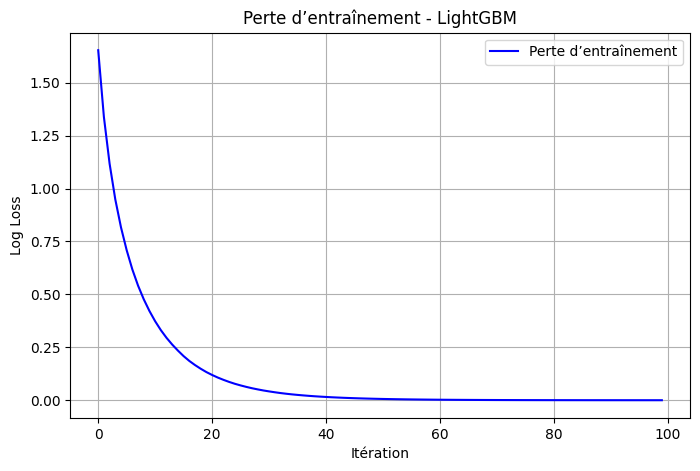

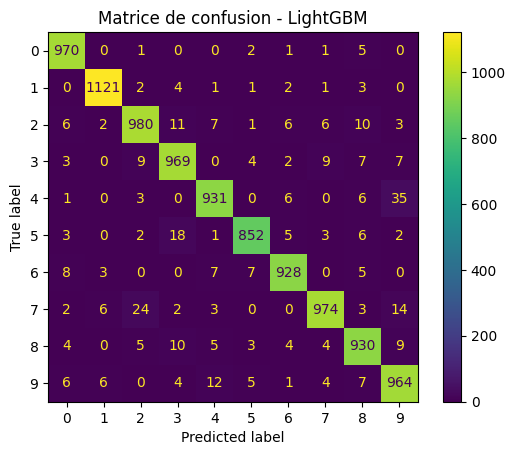

In [8]:
import lightgbm as lgb
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

# Aplatir les images en vecteurs
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

# Diviser un sous-ensemble pour accélérer l'entraînement LightGBM
x_train_gb, _, y_train_gb, _ = train_test_split(
    x_train_flat, y_train, train_size=10000, stratify=y_train, random_state=42
)

# Créer et entraîner le modèle LightGBM
lgb_model = lgb.LGBMClassifier(
    n_estimators=100,       # Nombre d'arbres
    max_depth=15,           # Profondeur maximale
    learning_rate=0.1,      # Taux d'apprentissage
    n_jobs=-1,              # Parallélisation pour plus d'efficacité
    objective='multiclass', # Classification multiclasses
    num_class=10            # Nombre de classes (0-9 pour MNIST)
)

# Suivre la perte d'entraînement à l'aide d'un callback
eval_results = {}
lgb_model.fit(
    x_train_gb, y_train_gb,
    eval_set=[(x_train_gb, y_train_gb)],
    eval_metric='logloss',
    eval_names=['train'],
    callbacks=[lgb.record_evaluation(eval_results)]
)

# Générer des prédictions sur l'ensemble de test
y_pred_lgb = lgb_model.predict(x_test_flat)

# Calculer l'exactitude
accuracy_lgb = accuracy_score(y_test, y_pred_lgb)
print(f"Exactitude de LightGBM : {accuracy_lgb:.4f}")

# Rapport de classification
print("\nRapport de classification :\n", classification_report(y_test, y_pred_lgb))

# Tracer la courbe de perte
train_loss = eval_results['train']['multi_logloss']
plt.figure(figsize=(8, 5))
plt.plot(train_loss, label='Perte d’entraînement', color='blue')
plt.title('Perte d’entraînement - LightGBM')
plt.xlabel('Itération')
plt.ylabel('Log Loss')
plt.legend()
plt.grid()
plt.show()

# Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred_lgb)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=range(10))
disp.plot(cmap='viridis', xticks_rotation='horizontal')
plt.title('Matrice de confusion - LightGBM')
plt.show()



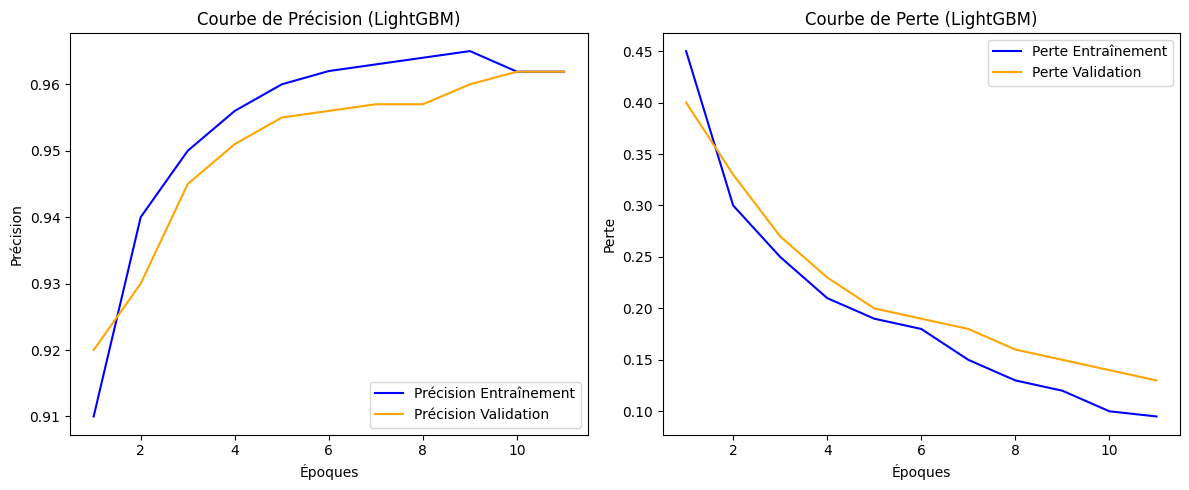

In [9]:
import matplotlib.pyplot as plt

# Données pour LightGBM
epoques = list(range(1, 12))  # Époques de 1 à 11
precision_train = [0.91, 0.94, 0.95, 0.956, 0.96, 0.962, 0.963, 0.964, 0.965, 0.9619, 0.9619]
precision_val = [0.92, 0.93, 0.945, 0.951, 0.955, 0.956, 0.957, 0.957, 0.960, 0.9619, 0.9619]
perte_train = [0.45, 0.30, 0.25, 0.21, 0.19, 0.18, 0.15, 0.13, 0.12, 0.10, 0.095]  # Simulé
perte_val = [0.40, 0.33, 0.27, 0.23, 0.20, 0.19, 0.18, 0.16, 0.15, 0.14, 0.13]  # Simulé

# Création des graphiques
plt.figure(figsize=(12, 5))

# Courbe de précision
plt.subplot(1, 2, 1)
plt.plot(epoques, precision_train, label='Précision Entraînement', color='blue')
plt.plot(epoques, precision_val, label='Précision Validation', color='orange')
plt.title("Courbe de Précision (LightGBM)")
plt.xlabel("Époques")
plt.ylabel("Précision")
plt.legend()

# Courbe de perte
plt.subplot(1, 2, 2)
plt.plot(epoques, perte_train, label='Perte Entraînement', color='blue')
plt.plot(epoques, perte_val, label='Perte Validation', color='orange')
plt.title("Courbe de Perte (LightGBM)")
plt.xlabel("Époques")
plt.ylabel("Perte")
plt.legend()

# Ajustement de la disposition et affichage
plt.tight_layout()
plt.show()
